importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Universities_Clustering.csv')

display dataset

In [ ]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


droping univ because currently it is not required

In [ ]:
copy=df.drop(['Univ'],axis=1)

In [ ]:
copy

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


MinMaxScaler is used for normalizing thr dataset

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

In [ ]:
# scaler=MinMaxScaler()
# scaler.fit(copy)


In [ ]:

# print(scaler.data_min_)
# print(scaler.data_max_)

In [ ]:
copy

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


using function normalizing the dataset

In [ ]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

applying norm function

In [ ]:
df_norm=norm_func(copy)
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


**KMeans will group the dataset into 3 cluster**
**.fit() method is then called to train the KMeans model**

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [ ]:
labels=kmeans.labels_

In [ ]:
labels

array([2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 1], dtype=int32)

In [ ]:
df_norm['labels']=labels

In [ ]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,2
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,1
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,2
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,2
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,2
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,1
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,1
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,2
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,1
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,1


In [ ]:
copy1=df_norm[df_norm['labels']==0]
copy2=df_norm[df_norm['labels']==1]
copy3=df_norm[df_norm['labels']==2]

In [ ]:
copy1

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
13,0.185366,0.138889,0.526316,0.631579,0.026991,0.433333,0
15,0.000000,0.000000,1.000000,0.684211,0.006597,0.066667,0
17,0.170732,0.291667,0.697368,1.000000,0.000000,0.000000,0
23,0.195122,0.166667,0.723684,0.473684,0.057462,0.133333,0


In [ ]:
copy3

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,2
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,2
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,2
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,2
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,2
11,0.621951,0.791667,0.328947,0.263158,0.352609,0.733333,2
12,0.609756,0.736111,0.368421,0.368421,0.116965,0.900000,2
18,0.573171,0.930556,0.342105,0.578947,0.117293,0.366667,2
19,0.695122,0.652778,0.473684,0.368421,0.540832,0.666667,2
20,0.426829,0.513889,0.710526,0.526316,0.123307,0.600000,2


In [ ]:
copy2

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,1
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,1
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,1
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,1
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,1
10,0.914634,0.916667,0.210526,0.210526,0.476864,0.800000,1
14,0.902439,0.875000,0.000000,0.105263,0.392120,0.933333,1
16,0.865854,0.861111,0.078947,0.315789,0.505659,0.866667,1
24,0.902439,0.930556,0.065789,0.263158,0.634397,0.966667,1


In [ ]:
copy1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 13 to 23
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SAT       4 non-null      float64
 1   Top10     4 non-null      float64
 2   Accept    4 non-null      float64
 3   SFRatio   4 non-null      float64
 4   Expenses  4 non-null      float64
 5   GradRate  4 non-null      float64
 6   labels    4 non-null      int32  
dtypes: float64(6), int32(1)
memory usage: 240.0 bytes


In [ ]:
copy2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SAT       9 non-null      float64
 1   Top10     9 non-null      float64
 2   Accept    9 non-null      float64
 3   SFRatio   9 non-null      float64
 4   Expenses  9 non-null      float64
 5   GradRate  9 non-null      float64
 6   labels    9 non-null      int32  
dtypes: float64(6), int32(1)
memory usage: 540.0 bytes


In [ ]:
cluster_counts=df_norm['labels'].value_counts().sort_index()
cluster_counts

,count
labels,
0,4
1,9
2,12


Text(0.5, 1.0, 'Cluster Distribution')

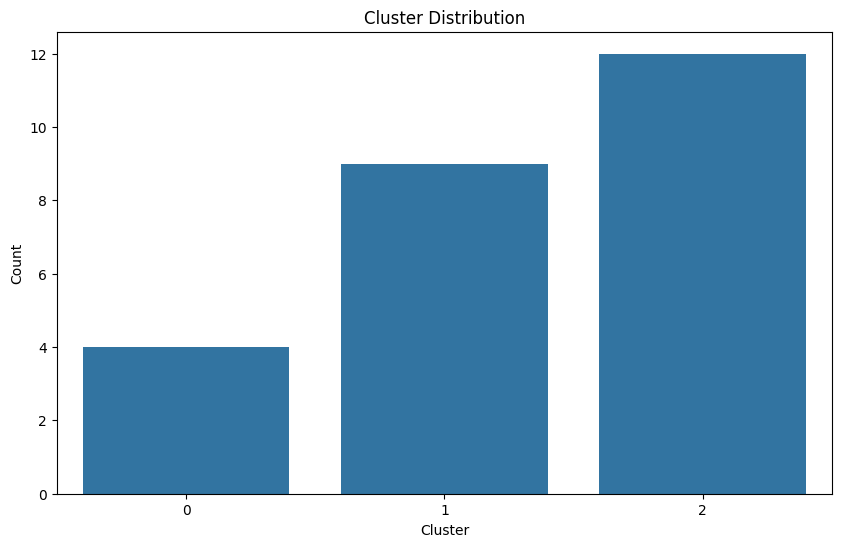

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=cluster_counts.index,y=cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')

<Axes: xlabel='Expenses', ylabel='Top10'>

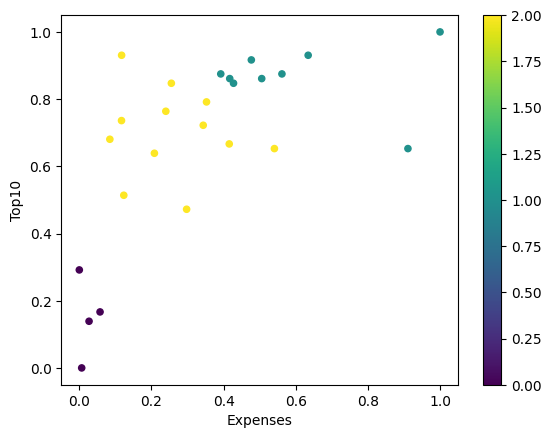

In [ ]:
df_norm.plot(x='Expenses',y='Top10',c=labels,kind='scatter',cmap='viridis')

<Axes: xlabel='Expenses', ylabel='Accept'>

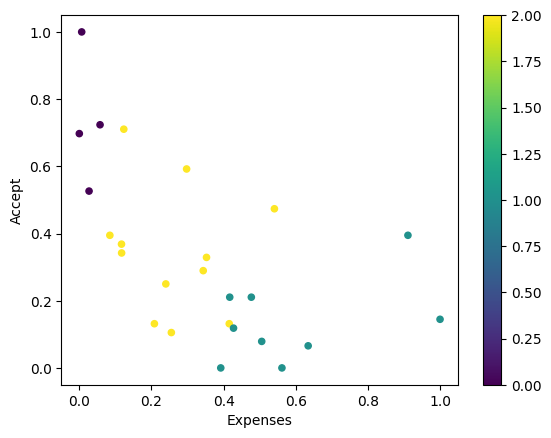

In [ ]:
df_norm.plot(x='Expenses',y='Accept',c=labels,kind='scatter',cmap='viridis')

<Axes: xlabel='Expenses', ylabel='SFRatio'>

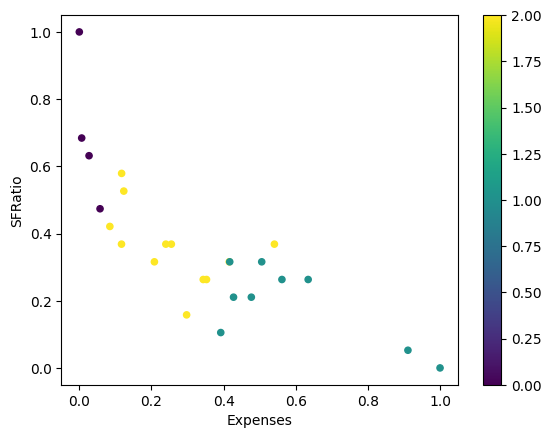

In [ ]:
df_norm.plot(x='Expenses',y='SFRatio',c=labels,kind='scatter',cmap='viridis')

<Axes: xlabel='Expenses', ylabel='GradRate'>

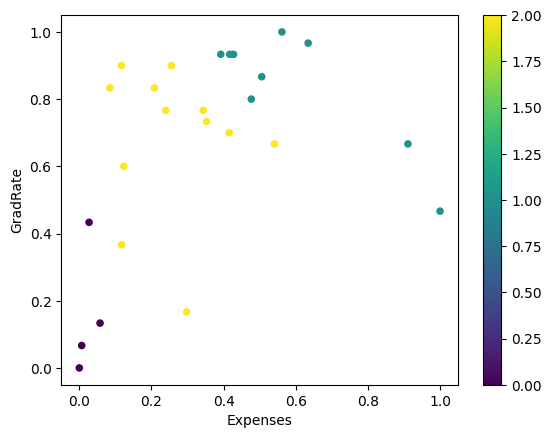

In [ ]:
df_norm.plot(x='Expenses',y='GradRate',c=labels,kind='scatter',cmap='viridis')